In [78]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')

In [79]:
df['title_length']=df['title'].str.len() # Calculate the length of the 'title' column and store it in a new column 'title_length'

In [80]:
df['description_length']=df['description'].str.len() # Calculate the length of the 'description' column and store it in a new column 'description_length'

In [81]:
df['decade_of_release']= (df['release_year']//10)*10 # Create a new column 'decade_of_release' by dividing 'release_year' by 10, taking the integer part, and multiplying by 10

In [82]:
df['has_description']=df['description'].notnull() # Create a boolean column 'has_description' indicating if the 'description' is not null

In [83]:
df['has_theme']= df['title'].str.contains('love|death|war',case=False,na=False) # Create a boolean column 'has_theme' indicating if 'title' contains 'love', 'death', or 'war' (case-insensitive)

In [84]:
df['has_description'].value_counts() # Count the occurrences of True and False in the 'has_description' column

,count
has_description,
True,8807


In [85]:
df['decade_of_release'].value_counts().head(1) # Count the occurrences of each decade in 'decade_of_release' and display the top 1

,count
decade_of_release,
2010,5927


In [86]:
df.groupby('type')['description_length'].mean() # Group the DataFrame by 'type' and calculate the mean of 'description_length' for each type

,description_length
type,
Movie,143.615723
TV Show,142.587444


In [87]:
df.groupby('rating')['description_length'].max().sort_values(ascending=False).head(1) # Group by 'rating', find the maximum 'description_length' for each rating, sort in descending order, and show the top 1

,description_length
rating,
TV-PG,248


In [88]:
display(df.loc[df['title_length'].idxmax()]) # Display the row with the maximum 'title_length'
df.loc[df['title_length'].idxmin()] # Display the row with the minimum 'title_length'

,5164
show_id,s5165
type,Movie
title,Jim & Andy: The Great Beyond - Featuring a Ver...
director,Chris Smith
cast,Jim Carrey
country,"Canada, United States"
date_added,"November 17, 2017"
release_year,2017
rating,TV-MA
duration,94 min


,2069
show_id,s2070
type,TV Show
title,H
director,NaN
cast,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe..."
country,France
date_added,"September 1, 2020"
release_year,2002
rating,TV-MA
duration,4 Seasons


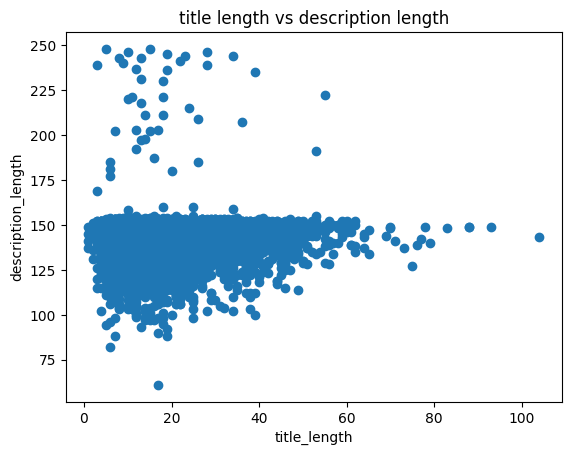

In [89]:
import matplotlib.pyplot as plt
# Create a scatter plot of 'title_length' vs 'description_length'
plt.scatter(df['title_length'],df['description_length'])
plt.xlabel('title_length')
plt.ylabel('description_length')
plt.title('title length vs description length')
plt.show()

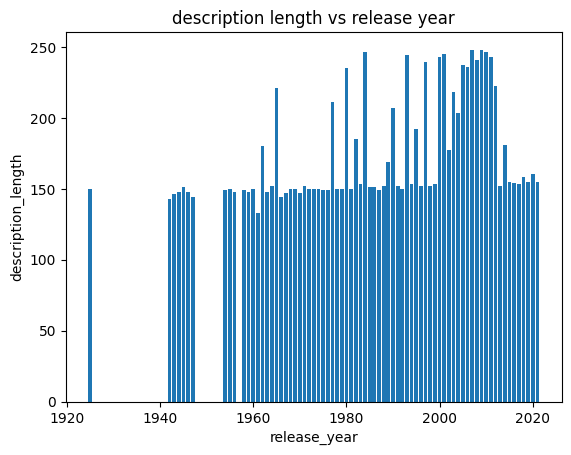

In [90]:
# Create a bar plot of 'release_year' vs 'description_length'
plt.bar(df['release_year'],df['description_length'])
plt.xlabel('release_year')
plt.ylabel('description_length')
plt.title('description length vs release year')
plt.show()

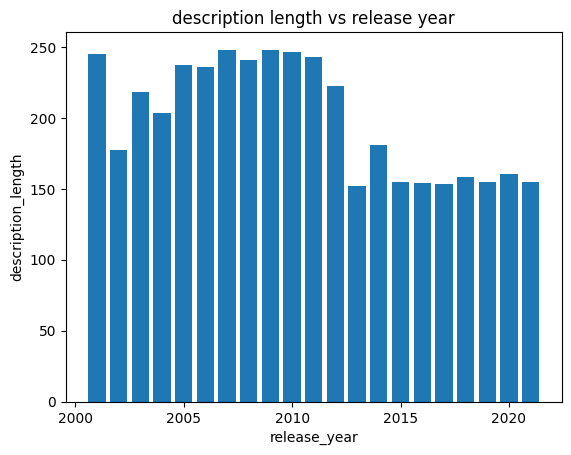

In [91]:
# Filter the DataFrame to include only rows where 'release_year' is greater than 2000
filtered = df[df['release_year']>2000]
# Create a bar plot of 'release_year' vs 'description_length' for the filtered data
plt.bar(filtered['release_year'],filtered['description_length'])
plt.xlabel('release_year')
plt.ylabel('description_length')
plt.title('description length vs release year')
plt.show()

<Axes: xlabel='country'>

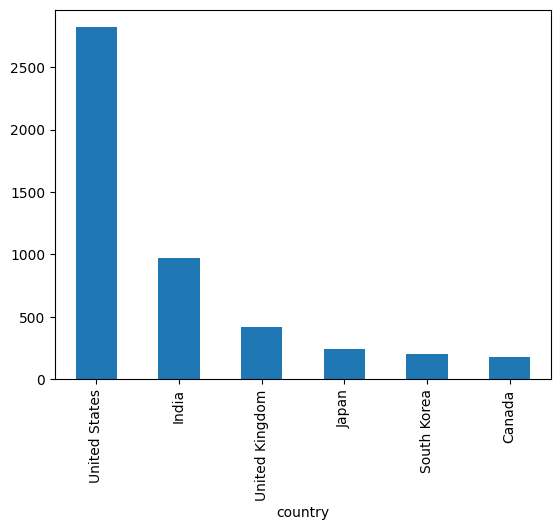

In [92]:
# Count the occurrences of each country, show the top 6, and plot as a bar chart
df['country'].value_counts().head(6).plot(kind='bar')

In [93]:
df.groupby('type')['title_length'].mean() # Group by 'type' and calculate the mean of 'title_length' for each type

,title_length
type,
Movie,18.029033
TV Show,17.031016


<Axes: xlabel='decade_of_release', ylabel='number of shows/movies'>

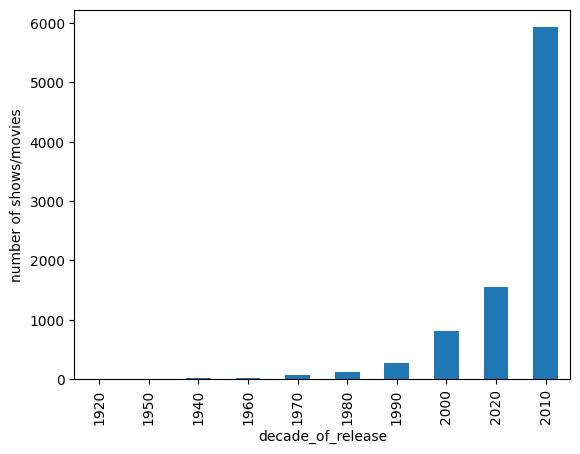

In [94]:
df['decade_of_release'].value_counts().sort_values().plot(kind='bar', xlabel='decade_of_release', ylabel='number of shows/movies')
# Count occurrences of each decade, sort, and plot as a bar chart with labels

<Axes: xlabel='type'>

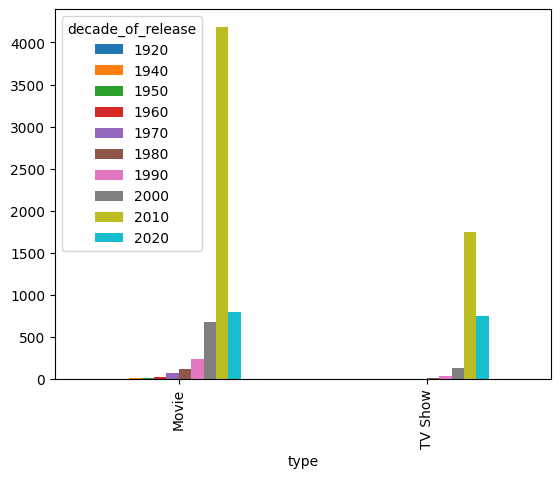

In [95]:
df.groupby('type')['decade_of_release'].value_counts().unstack().plot(kind='bar') # Group by 'type' and 'decade_of_release', unstack, and plot as a bar chart

<Axes: xlabel='decade_of_release'>

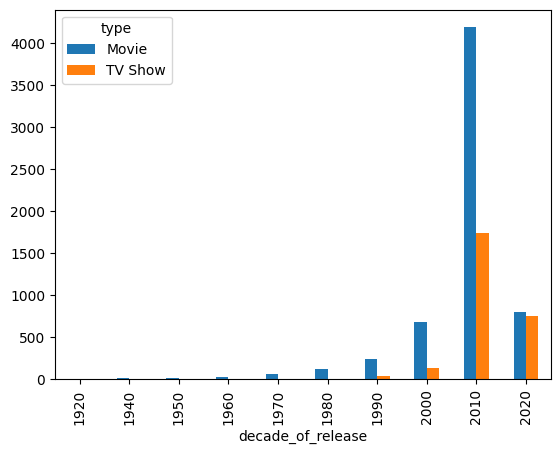

In [96]:
pd.pivot_table(df,index='decade_of_release',columns='type',values='title_length',aggfunc='count').plot(kind='bar') # Create a pivot table with 'decade_of_release' as index, 'type' as columns, counting 'title_length', and plot as a bar chart

<Axes: xlabel='decade_of_release'>

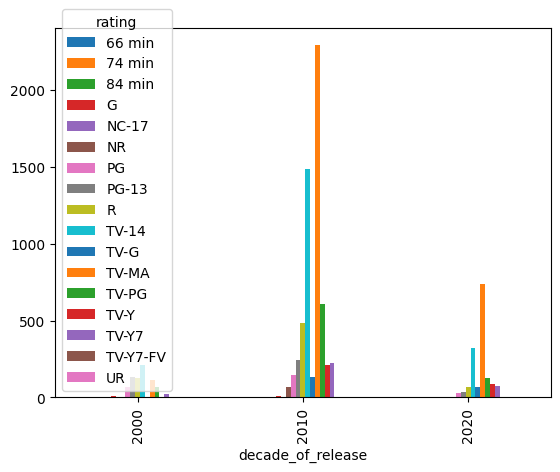

In [97]:
# Filter the DataFrame for release years after 2000
filtered = df[df['release_year']>2000]
# Create a pivot table for the filtered data with 'decade_of_release' as index, 'rating' as columns, counting 'type', and plot as a bar chart
pd.pivot_table(filtered,index='decade_of_release',columns='rating',values='type',aggfunc='count').plot(kind='bar')